In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


cap = cv2.VideoCapture("Videos/walking.avi")

parameters_shitomasi = dict(maxCorners = 100, qualityLevel = 0.3,minDistance = 7)

parameters_lucas_kanade = dict(winSize = (15,15), maxLevel = 2,
                              criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,0.03))

In [2]:
colors = np.random.randint(0,255, (100,3))
colors.shape,colors.max(),colors.min()

((100, 3), 251, 0)

In [3]:
conn, frame = cap.read()

frame_gray_init = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frame_gray_init.shape, frame.shape

((576, 768), (576, 768, 3))

In [4]:
edges = cv2.goodFeaturesToTrack(frame_gray_init,mask = None, **parameters_shitomasi)

edges.shape

(38, 1, 2)

In [5]:
mask = np.zeros_like(frame)

print(np.shape(mask))

(576, 768, 3)


In [6]:
for edge in edges:
    
    x,y  = edge[0]
    #print(x,y)
    
    cv2.circle(mask,(int(x),int(y)),4,(255,0,0),-1)

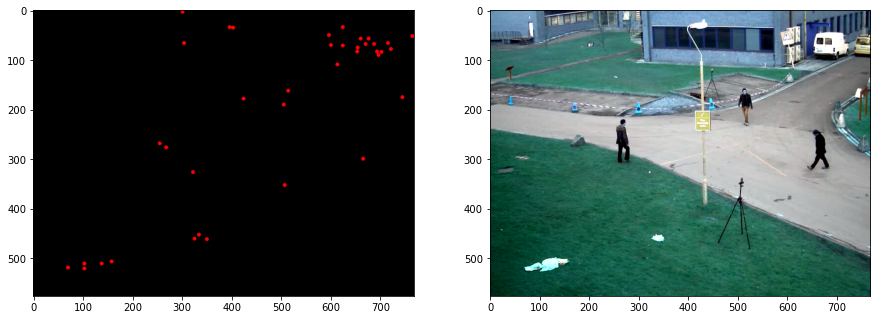

In [7]:
plt.figure(figsize = (15,6))

plt.subplot(121)
plt.imshow(mask, cmap = "gray")

plt.subplot(122)
plt.imshow(frame, cmap = "gray")

plt.show()

In [8]:
status = 0 

edges[status == 0].shape,edges[status == 1].shape,edges.shape

((1, 38, 1, 2), (0, 38, 1, 2), (38, 1, 2))

In [9]:
while True:
    
    conn, frame = cap.read()
    
    if not conn:
        break
    
    frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    new_edges , status, error = cv2.calcOpticalFlowPyrLK(frame_gray_init,frame_gray,edges,
                                                         None,**parameters_lucas_kanade)
    
    #print(status)
    news = new_edges[status == 1]
    olds = edges[status == 1]
    
    for i, (new, old) in enumerate(zip(news,olds)):
        
        a,b = new.ravel()
        c,d = old.ravel()
        
        mask = cv2.line(mask,( int(a),int(b) ),( int(c),int(d) ), colors[i].tolist(), 2)
        frame = cv2.circle(frame, ( int(a),int(b) ),5, colors[i].tolist(), -1)
        
    img = cv2.add(frame,mask)
    cv2.imshow("Optical Flow Sparse",img)
    cv2.imshow("Mask", mask)
    cv2.imshow("Frame",frame)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
        
    frame_gray_init = frame_gray.copy()
    edges = news.reshape(-1,1,2)
    
cv2.destroyAllWindows()
cap.release()

## 

In [13]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

conn , frame = cap.read()

frame_gray_init = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

parameters_lucas_kanade = dict(winSize = (15,15), maxLevel = 4,
                              criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))



def select_point(event, x, y, flags, params):
    
    global  point, selected_point, old_points
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        point = (x,y)
        selected_point = True
        old_points = np.array([[x,y,]], dtype = np.float32)
        
        
cv2.namedWindow("Frame")
cv2.setMouseCallback("Frame",select_point)

selected_point = False
point = ()
old_points = np.array([[]])
mask = np.zeros_like(frame)

while True:
    
    conn, frame = cap.read()
    if not conn:
        break
        
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if selected_point == True:
        
        cv2.circle(frame,point,5,(0,0,255),2)
        
        new_points , status, errors = cv2.calcOpticalFlowPyrLK(frame_gray_init,frame_gray, old_points,
                                                              None,**parameters_lucas_kanade)
        
        frame_gray_init = frame_gray.copy()
        old_points = new_points
        
        x,y = new_points.ravel()
        j,k = old_points.ravel()
        
        mask = cv2.line(mask, (int(x),int(y)), (int(j),int(k)),(0,255,255),2)
        frame = cv2.circle(frame,(int(x),int(y)),5, (0,255,0),-1)
        
    img = cv2.add(frame,mask)
    cv2.imshow("Optical Flow Sparse",img)
    cv2.imshow("Mask", mask)
    cv2.imshow("Frame",frame)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
        
cv2.destroyAllWindows()
cap.release()

## 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cap = cv2.VideoCapture("Videos/walking.avi")
conn,first_frame = cap.read()
frame_gray_init = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

hsv = np.zeros_like(first_frame)

np.shape(first_frame),np.shape(hsv)

((576, 768, 3), (576, 768, 3))

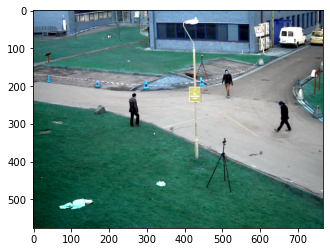

In [4]:
plt.imshow(first_frame)

In [5]:
# Saturation (S)

hsv[...,1] = 255
hsv[0]

array([[  0, 255,   0],
       [  0, 255,   0],
       [  0, 255,   0],
       ...,
       [  0, 255,   0],
       [  0, 255,   0],
       [  0, 255,   0]], dtype=uint8)

In [6]:
while True:
    
    conn, frame = cap.read()
    
    if not conn:
        break
        
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 30 - > 10 - > 3
    flow = cv2.calcOpticalFlowFarneback(frame_gray_init,frame_gray,None, 0.5, 3, 15, 3, 5, 1.1, 0)
    
    print(flow.shape)
    
    magnitude, angle = cv2.cartToPolar(flow[...,0],flow[...,1]) # X, Y
    
    print(magnitude.shape,angle.shape)
    
    #Hue
    hsv[...,0] = angle * (180 / (np.pi /2))
    
    
    hsv[...,2] = cv2.normalize(magnitude,None,0,255,cv2.NORM_MINMAX)
    
    frame_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    cv2.imshow("Frame", frame_rgb)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    frame_gray_init = frame_gray
    
cv2.destroyAllWindows()
cap.release()

(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (576, 768)
(576, 768, 2)
(576, 768) (57